In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (cross-entropy loss)
def cost_function(X, Y, theta):
    m = len(Y)
    h = sigmoid(X @ theta)
    cost = (1 / m) * (-Y.T @ np.log(h) - (1 - Y).T @ np.log(1 - h))
    return cost

# Gradient descent to minimize the cost function
def gradient_descent(X, Y, theta, alpha, num_iters):
    m = len(Y)
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - Y))
        theta -= alpha * gradient
        J_history.append(cost_function(X, Y, theta))
    return theta, J_history

# Predict function
def predict(X, theta):
    h = sigmoid(X @ theta)
    return (h >= 0.5).astype(int)

# Load data using panda
data = pd.read_csv("breast-cancer.csv")

In [2]:
print("Rows: ", len(data))
print("Columns: ", len(data.columns))
print("Shape : ", data.shape)

Rows:  569
Columns:  32
Shape :  (569, 32)


In [3]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
# Separate features (X) and target variable (Y)
X = data.drop("diagnosis", axis=1).values  # Features (all columns except diagnosis)
Y = (data["diagnosis"] == 'M').astype(int).values  # Target variable (diagnosis labels)

# Z-score normalization
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# np.mean is numpy function to calculate the mean of the feature
# np.std is numpy function to calculate the standard deviation of the feature

# Add intercept term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Initialize parameters
theta = np.zeros(X_train.shape[1])

# HYperparameters
alpha = 0.1
num_iters = 1000

Confusion Matrix:
 [[79  0]
 [ 1 34]]
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9714285714285714
F1-score: 0.9855072463768116


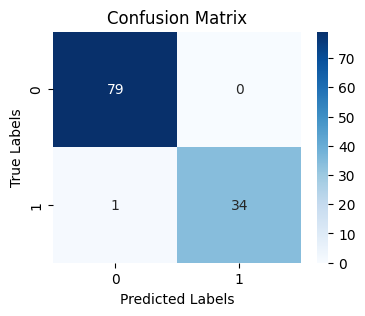

In [5]:
# Train the model
theta, J_history = gradient_descent(X_train, Y_train, theta, alpha, num_iters)

# Make predictions on the testing data
Y_pred = predict(X_test, theta)

# Calculate evaluation metrics using scikit-learn
conf_matrix = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Visualize confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

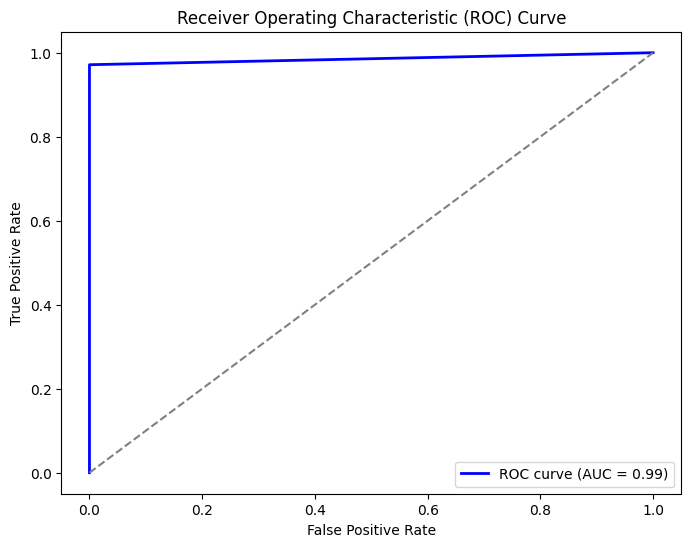

In [6]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
auc = roc_auc_score(Y_test, Y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


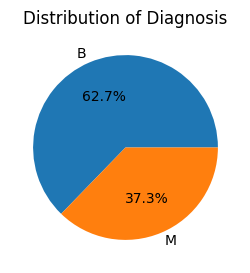

In [7]:
# Pie chart
plt.figure(figsize=(3, 3))
plt.pie(data['diagnosis'].value_counts(), labels=data['diagnosis'].value_counts().index, autopct='%1.1f%%', colors=['tab:blue', 'tab:orange'])
plt.title('Distribution of Diagnosis')
plt.show()


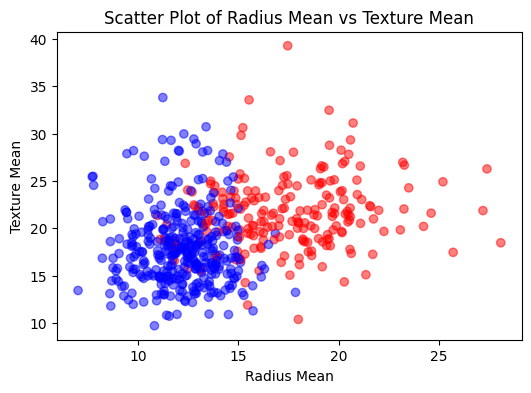

In [8]:
# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(data['radius_mean'], data['texture_mean'], c=data['diagnosis'].map({'M': 'red', 'B': 'blue'}), alpha=0.5)
plt.title('Scatter Plot of Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()


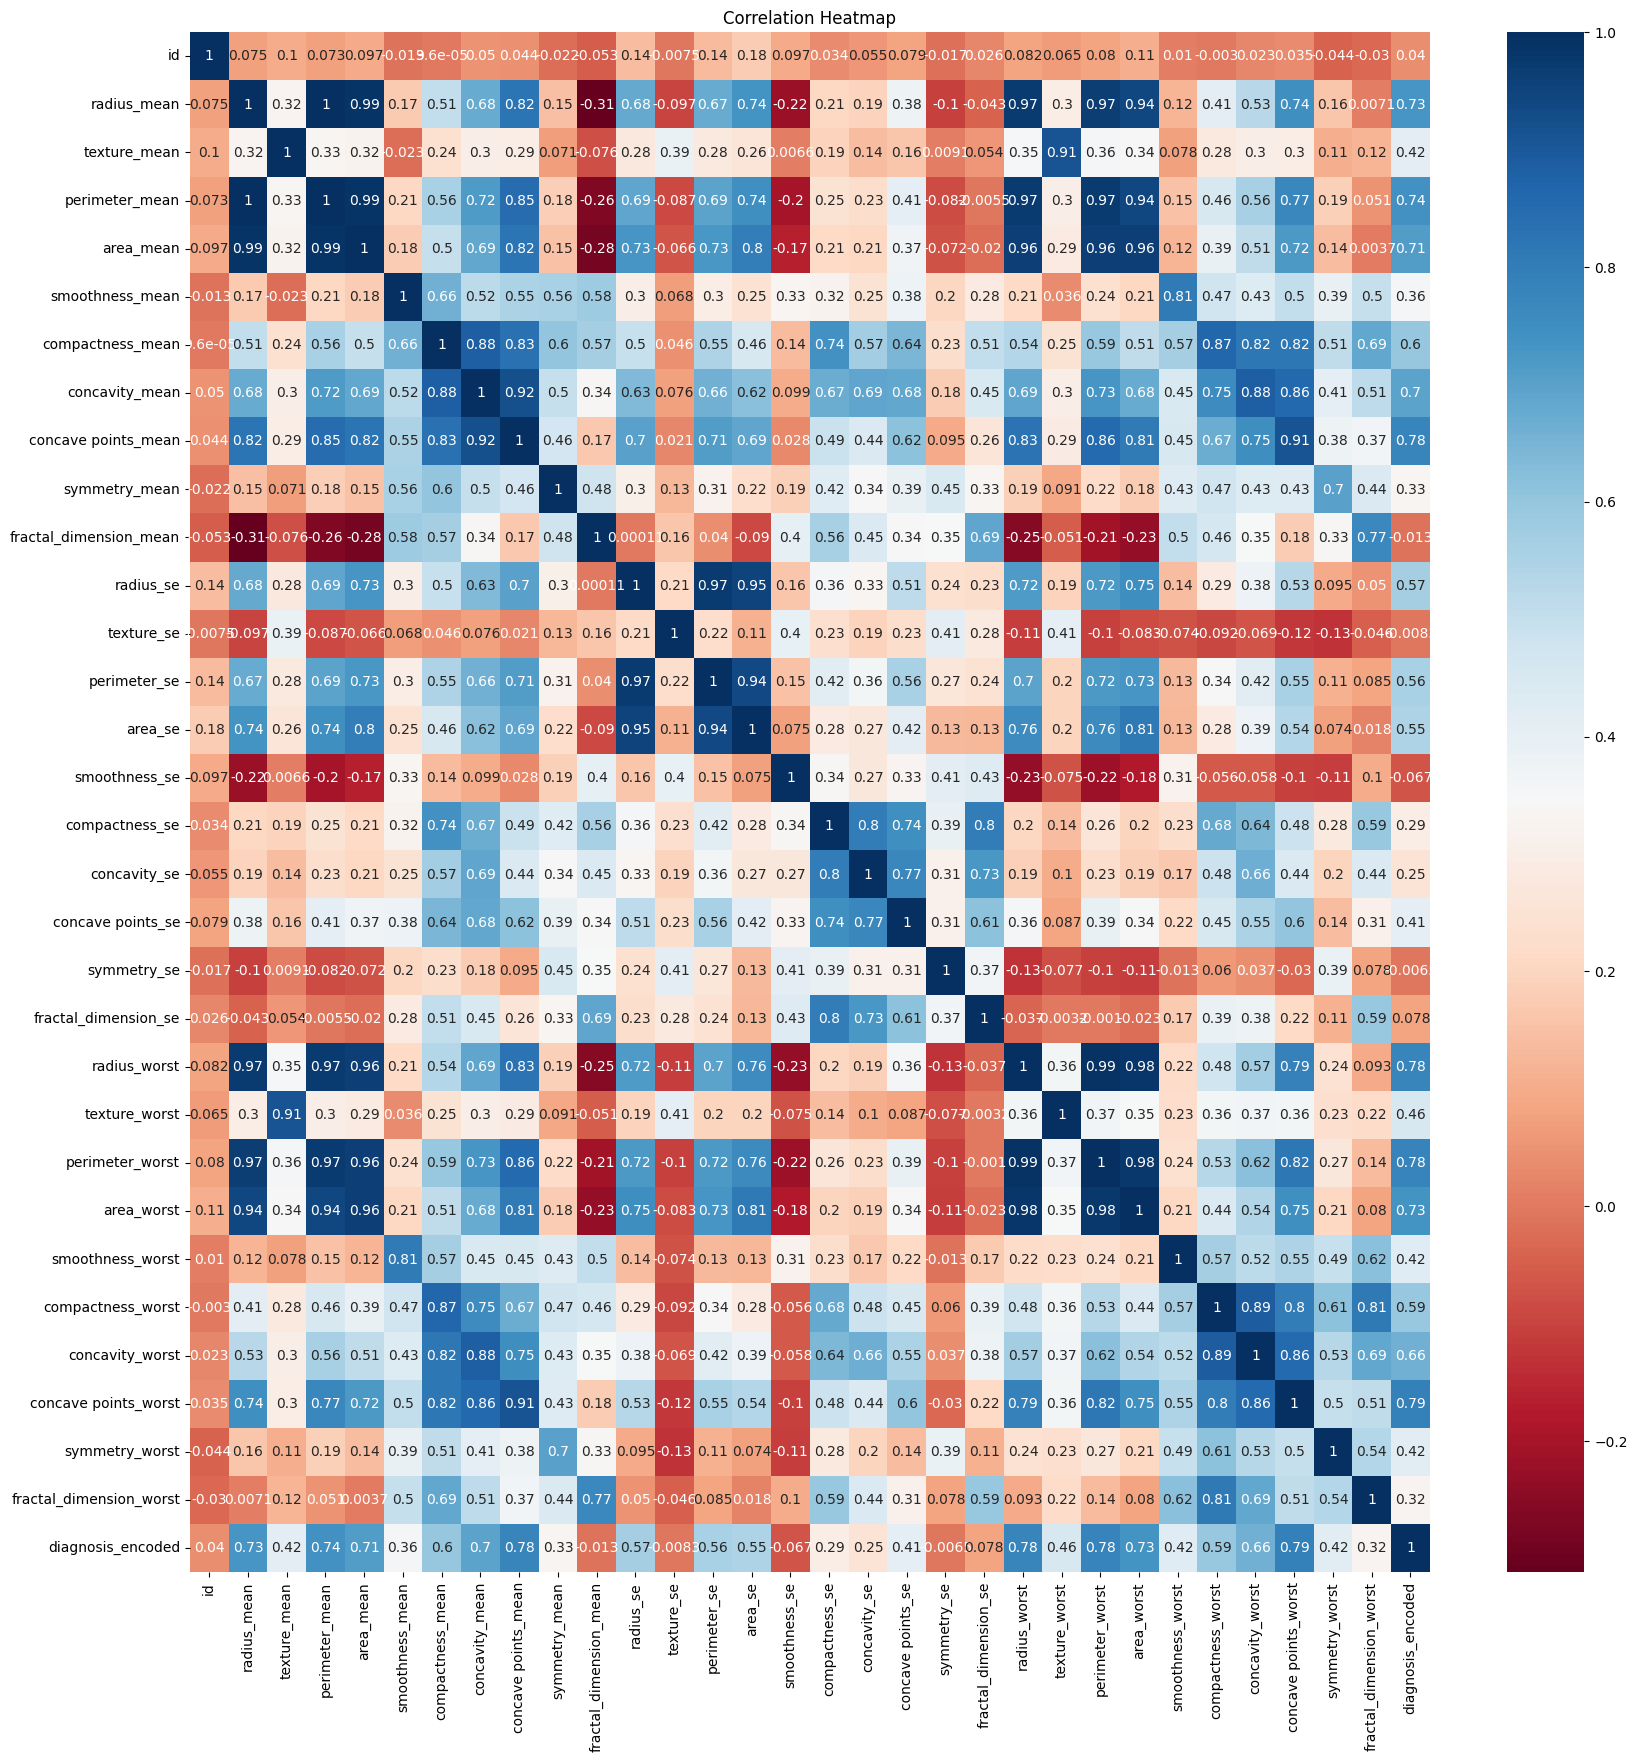

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable 'diagnosis'
label_encoder = LabelEncoder()
data['diagnosis_encoded'] = label_encoder.fit_transform(data['diagnosis'])
# Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=['diagnosis']).corr(), annot=True, cmap="RdBu")
plt.title('Correlation Heatmap')
plt.show()


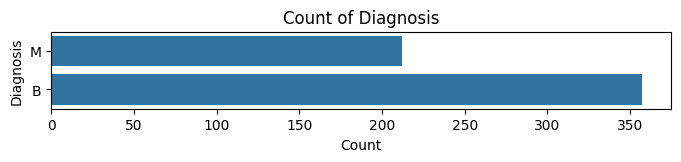

In [10]:
# Bar plot
plt.figure(figsize=(8, 1))
sns.countplot(data['diagnosis'])
plt.title('Count of Diagnosis')
plt.ylabel('Diagnosis')
plt.xlabel('Count') 
plt.show()
